<a href="https://colab.research.google.com/github/Anishmodi20/Sample-Set-LLC/blob/main/Customer_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing the text data**

In [ ]:
import pandas as pd
import numpy as np

#Load the dataset
df = pd.read_csv("/content/BA - Assignment Part 2 data set.csv", engine="python")

In [ ]:
# Display the first 5 rows of the dataset
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# Display the total number of rows in the dataset
len(df)

23486

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Function to clean the text data
def clean_data(review):
  if isinstance(review, str):
    remove_punc = re.sub(r'[^\w\s]', '', review)
    remove_digits = "".join([i for i in remove_punc if not i.isdigit()])
    remove_hyphens = remove_digits.replace('-', ' ')
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in remove_digits.split() if word not in stopwords.words('english')])

    return text
  else:
    return review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Performing sentiment analysis to classify the commnents**

In [ ]:
# Function to convert numerical rating into sentiment

def rate_sentiment(rating):
  if rating == 1 or rating == 2:
    return -1
  elif rating == 4 or rating == 5:
    return 1
  else:
    return 0

# Add a new column 'Sentiment' to the dataframe using the rate_sentiment function
df["Sentiment"] = df["Rating"].apply(rate_sentiment)

In [ ]:
# Display the first 5 rows of the dataset with the new 'Sentiment' column
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1


In [ ]:
# Display the original text of the first review
df["Review Text"][0]

'Absolutely wonderful - silky and sexy and comfortable'

In [ ]:
# Apply the clean_data function to the 'Review Text' column
df["Review Text"] = df["Review Text"].apply(clean_data)

# Display the cleaned text of the first review
df["Review Text"][0]

'Absolutely wonderful silky sexy comfortable'

# **Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Fill missing values in the 'Review Text' column with an empty string
df["Review Text"].fillna("", inplace=True)

# Create a TfidfVectorizer for feature extraction
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

# Transform the 'Review Text' column into TF-IDF features
X = tfidf.fit_transform(df["Review Text"])

# Display the cleaned text of the first review after feature extraction
df["Review Text"][0]

'Absolutely wonderful silky sexy comfortable'

In [ ]:
# Split the data into training and testing datasets
y = df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

# **Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Test the model by predicting on the test dataset
preds = lr.predict(X_test)
preds

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Model Evaaluation
from sklearn.metrics import accuracy_score

# Evaluate the model's performance using accuracy score
accuracy_score(preds, y_test)

0.8147138964577657

In [ ]:
# Save the output file
output_file_path = "/content/classified_dataset.csv"

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test.toarray())
classified_dataset = pd.DataFrame({
    'Review Text': df.loc[X_test_df.index, 'Review Text'].values,  # Use .values to convert to a NumPy array
    'Original Rating': df.loc[X_test_df.index, 'Rating'].values,  # Use .values to convert to a NumPy array
    'Predicted Sentiment': preds
})

# Map numerical predictions to sentiment labels
classified_dataset['Predicted Sentiment Label'] = classified_dataset['Predicted Sentiment'].map({1: 'Positive', 0: 'Neutral', -1: 'Negative'})

# Display the shape of the classified dataset before saving
print("Shape of classified_dataset:", classified_dataset.shape)

# Merge with the rest of the columns from the original dataset
classified_dataset = pd.merge(df.loc[X_test_df.index], classified_dataset, left_index=True, right_index=True)

# Save the classified dataset to CSV
classified_dataset.to_csv(output_file_path, index=False, encoding='utf-8')

print(f"Classified dataset saved to {output_file_path}")

Shape of classified_dataset: (5872, 4)
Classified dataset saved to /content/classified_dataset.csv


# **Summarizing Sentiment Distribution**


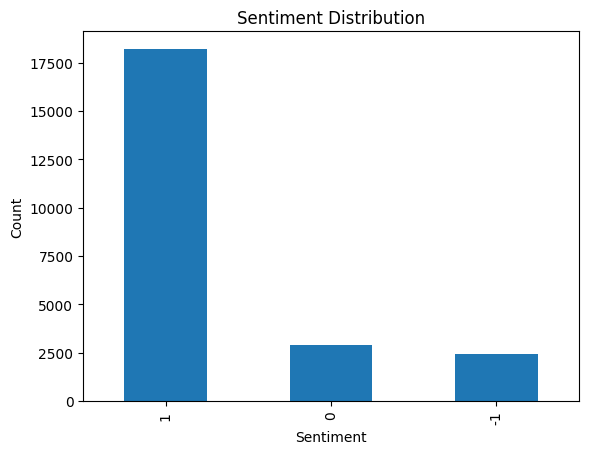

In [ ]:
import matplotlib.pyplot as plt

# Calculate the distribution of sentiments in the dataset
sentiment_distribution = df["Sentiment"].value_counts()

# Plot the distribution as a bar chart
sentiment_distribution.plot(kind='bar', title='Sentiment Distribution')

# Label the x and y axes
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()

# **Word Frequency Analysis**

In [ ]:
# Create separate DataFrames for positive and negative reviews
positive_reviews = df[df["Sentiment"] == 1]["Review Text"]
negative_reviews = df[df["Sentiment"] == -1]["Review Text"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get the top words in reviews
def get_top_words(reviews, n=10):
    vectorizer = CountVectorizer()
    word_matrix = vectorizer.fit_transform(reviews)
    feature_names = vectorizer.get_feature_names_out()  # Corrected method
    word_freq = zip(feature_names, word_matrix.sum(axis=0).tolist()[0])
    sorted_words = sorted(word_freq, key=lambda x: x[1], reverse=True)[:n]
    return sorted_words

# Get the top words in positive reviews
top_positive_words = get_top_words(positive_reviews)
print("Top words in positive reviews:", top_positive_words)

# Get the top words in negative reviews
top_negative_words = get_top_words(negative_reviews)
print("Top words in negative reviews:", top_negative_words)

Top words in positive reviews: [('dress', 8652), ('fit', 8120), ('love', 7759), ('size', 7480), ('top', 6133), ('color', 5553), ('wear', 5461), ('great', 5379), ('look', 4926), ('like', 4840)]
Top words in negative reviews: [('dress', 1201), ('like', 1050), ('look', 901), ('top', 896), ('size', 766), ('fit', 758), ('would', 723), ('fabric', 721), ('back', 606), ('color', 545)]
